# Canada Refugee Statistics Exploratory Data Analysis

In this project we perform Exploratory Data Analysis (EDA) on UNHCR Refugee Statistics for Canada from 2012-2022.

Questions


*   From which countries has Canada admitted the highest number of refugees?
*   What are the total number of resettled refugees in Canada per year?
*   What are the countries of origin for the majority of asylum claims made in Canada?
*   What is the total number of asylum claims made in Canada every year?
*   What are the general trends in refugee and asylum statistics from 2012-2022?
*   Elemento de la list

# Notebook Content

1.   **Step 1**: Import Necessary Libraries
2.   **Step 2**: Reading, Exploring and Preparing Data
3.   **Step 3**: Exploratory Data Analysis + Visualization
4.   2012- 2022 Canada Refugee Statistics EDA Results Summary



# Step 1: Import Necessary Libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Reading, Exploring and Preparing Data

In [23]:
data = pd.read_csv("/content/can-stats-2012-22.csv")

In [24]:
data.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [26]:
data.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [27]:
data.shape

(1870, 5)

In [28]:
data.isnull().any()

Year                 False
Country-of-origin    False
UNHCR-refugees       False
Asylum-seekers       False
total-count          False
dtype: bool

In [29]:
pd.DataFrame(data.isnull().sum(),columns=["missing values"])

,missing values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


# Step 3: Exploratory Data Analysis + Visualization

# Question 1: Countries From Which Canada Has Admitted Highest Number of Refugees

In [31]:
# Grouping the data by "Country-of-origin" and summing up the "UNHCR-refugees" for each country
top_unhcr_refugees = data.groupby("Country-of-origin")["UNHCR-refugees"].sum().reset_index(name="UNHCR-refugees")

# Sorting the grouped data in descending order based on the total number of UNHCR refugees and selecting the top 10
top_unhcr_refugees = top_unhcr_refugees.sort_values(by="UNHCR-refugees", ascending=False).head(10)

# Resetting the index and creating a bar chart style for better visualization
top_unhcr_refugees.reset_index(drop=True).style.bar()


,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


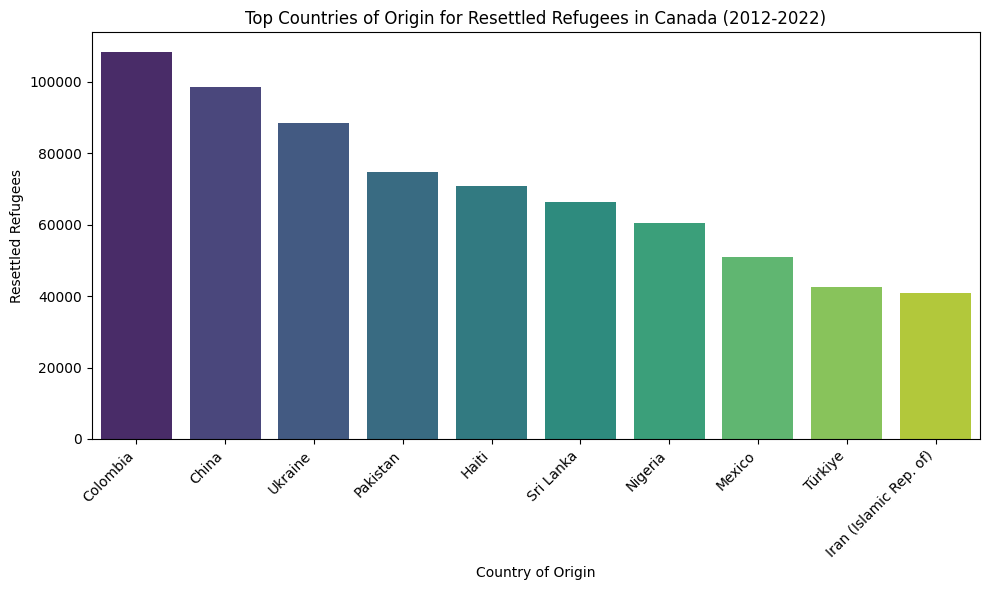

In [32]:
# Setting up the figure size for better visibility
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn
# x-axis: Country of Origin, y-axis: UNHCR Refugees, color palette: mako
sns.barplot(data=top_unhcr_refugees, x="Country-of-origin", y="UNHCR-refugees", palette="viridis")

# Adding labels to the x and y axes
plt.xlabel("Country of Origin")
plt.ylabel("Resettled Refugees")

# Adding a title to the plot
plt.title("Top Countries of Origin for Resettled Refugees in Canada (2012-2022)")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Displaying the plot
plt.tight_layout()
plt.show()


# Question 2: Total Number of Resettled Refugees in Canada Per Year

In [19]:
# Group data by year, summing the UNHCR refugee counts, and sorting by year
total_refugees_yrly = data.groupby("Year")["UNHCR-refugees"].sum().reset_index(name="UNHCR-refugees").sort_values(by="Year")

# Resetting the index for a clean representation
total_refugees_yrly.reset_index(drop=True)

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


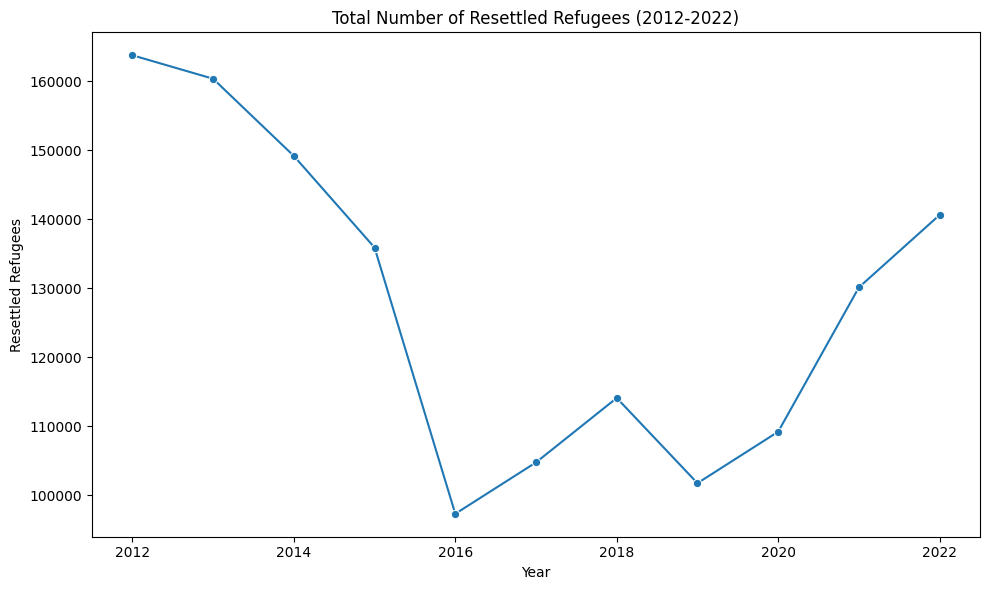

In [20]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a line plot with markers for the total number of resettled refugees over the years
sns.lineplot(data=total_refugees_yrly, x="Year", y="UNHCR-refugees", marker="o")

# Labeling the axes and providing a title for the plot
plt.xlabel("Year")
plt.ylabel("Resettled Refugees")
plt.title("Total Number of Resettled Refugees (2012-2022)")

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Question 3: Countries of Origin for Majority of Asylum Claims Made in Canada

In [17]:
# Group data by "Country-of-origin" and sum the asylum seekers, then select the top 10
top_asylum_seekers = data.groupby("Country-of-origin")["Asylum-seekers"].sum().reset_index(name="Asylum-seekers").sort_values(by="Asylum-seekers", ascending=False).head(10)

# Reset the index and apply a bar style for better visualization
top_asylum_seekers.reset_index(drop=True).style.bar()

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


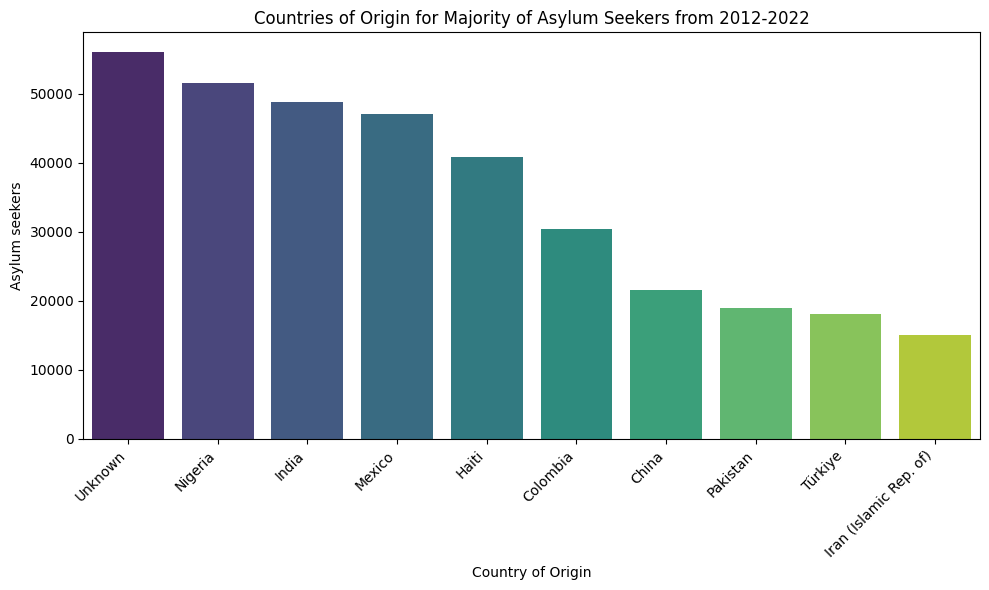

In [18]:
# Create a bar plot for the top asylum seekers' countries of origin
plt.figure(figsize=(10, 6))
sns.barplot(data=top_asylum_seekers, x="Country-of-origin", y="Asylum-seekers", palette="viridis")

# Add labels and title for better interpretation
plt.xlabel("Country of Origin")
plt.ylabel("Asylum seekers")
plt.title("Countries of Origin for Majority of Asylum Seekers from 2012-2022")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

# Question 4: Total Number of Asylum Claims Made in Canada Every Year

In [15]:
# Group data by year and sum the asylum seekers for each year
asylum_seekers_yrly = data.groupby("Year")["Asylum-seekers"].sum().reset_index(name="Asylum-seekers").sort_values(by="Year")

# Reset the index for better presentation
asylum_seekers_yrly.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


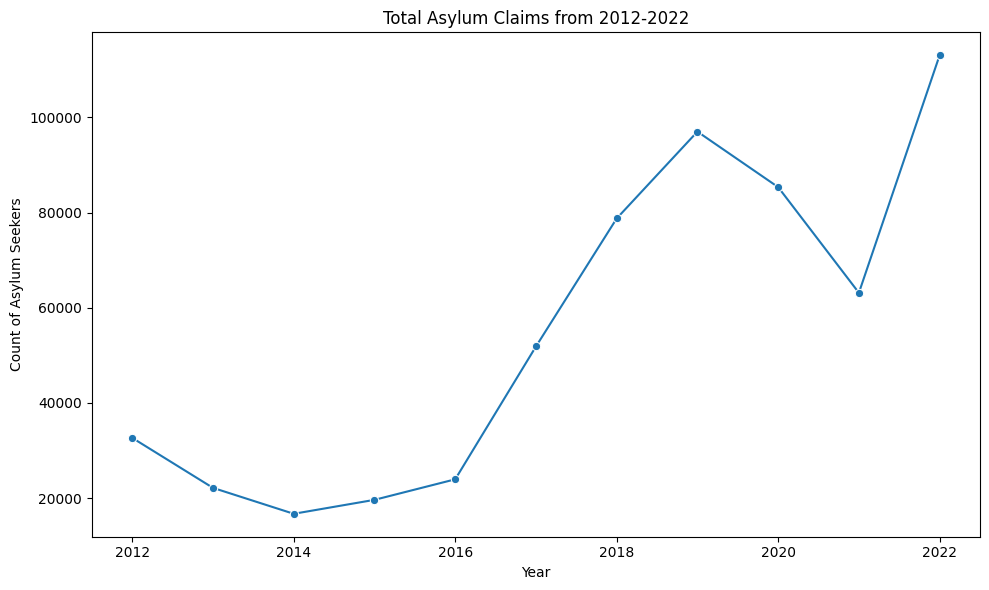

In [16]:
# Plotting a line plot for asylum seekers over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=asylum_seekers_yrly, x="Year", y="Asylum-seekers", marker="o")

# Adding labels and title for better interpretation
plt.xlabel("Year")
plt.ylabel("Count of Asylum Seekers")
plt.title("Total Asylum Claims from 2012-2022")

# Display the plot
plt.tight_layout()
plt.show()

# Question 5: General Trends in Refugee and Asylum Statistics from 2012-2022

In [12]:
# Group data by "Country-of-origin," sum the "total-count" values, and get the top 10 countries
top_countries = data.groupby("Country-of-origin")["total-count"].sum().reset_index(name="total-count").sort_values(by="total-count", ascending=False).head(10)

# Reset the index for cleaner representation and apply a styled bar chart using pandas
top_countries.reset_index(drop=True).style.bar()

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


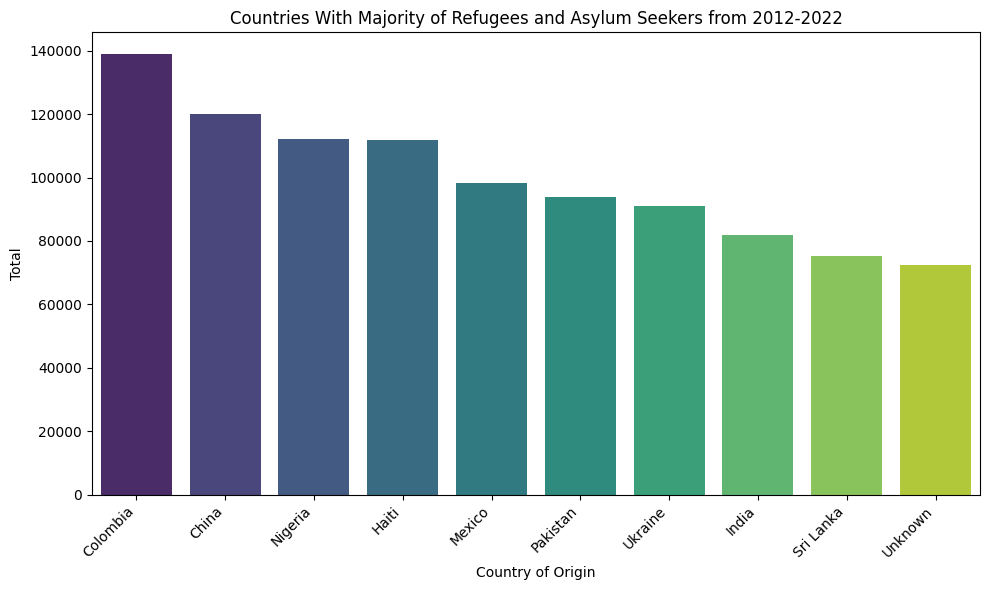

In [13]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn with the specified data, x, y, and color palette
sns.barplot(data=top_countries, x="Country-of-origin", y="total-count", palette="viridis")

# Set labels for the axes
plt.xlabel("Country of Origin")
plt.ylabel("Total")

# Set the title for the plot
plt.title("Countries With Majority of Refugees and Asylum Seekers from 2012-2022")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


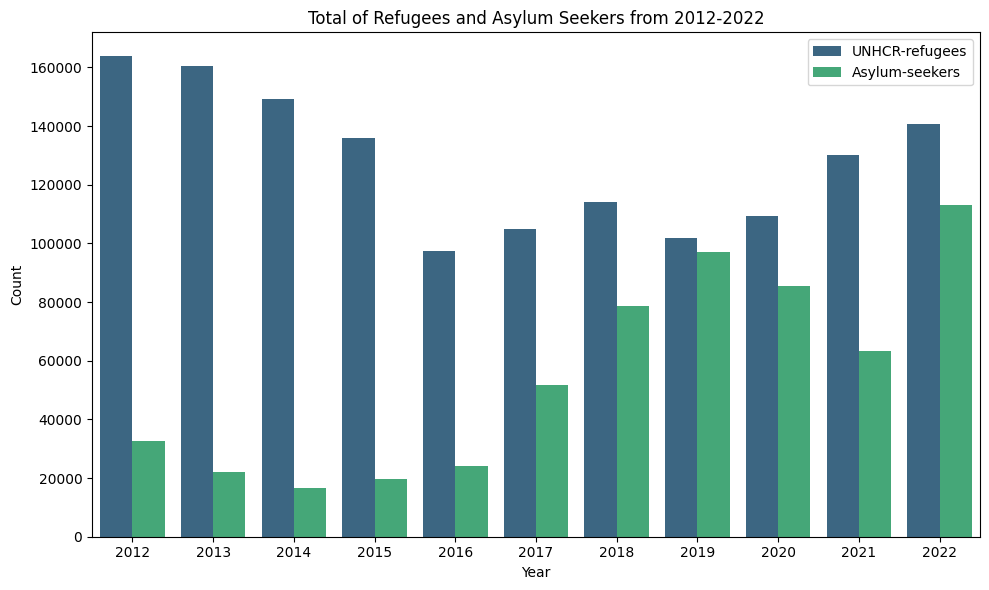

In [14]:
# Group data by Year and sum the counts for UNHCR refugees and Asylum seekers
yearly_counts = data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()

# Melt the data to create a long-format DataFrame suitable for visualization
melted_data = pd.melt(yearly_counts, id_vars="Year", var_name="Category", value_name="count")

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn with the specified data, x, y, hue, and color palette
sns.barplot(data=melted_data, x="Year", y="count", hue="Category", palette="viridis")

# Set labels for the axes
plt.xlabel("Year")
plt.ylabel("Count")

# Set the title for the plot
plt.title("Total of Refugees and Asylum Seekers from 2012-2022")

# Add legend to the plot to distinguish between UNHCR refugees and Asylum seekers
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


# 2012- 2022 Canada Refugee Statistics EDA Results Summary
**Countries From Which Canada Has Admitted Highest Number of Refugees:**

Colombia (108,416)

*   Colombia (108,416)
*   China (98,586)
*   Ukraine (88,376)
*   Pakistan (74,737)
*   Haiti (70,956)
*   Sri Lanka (66,343)
*   Nigeria (60,554)
*   Mexico (51,072)
*   Türkiye (42,533)
*   Iran (40,881)

Canada welcomes a diversity of refugees, led by Colombia. This, along with other nations, reflects Canada's commitment to diversity and humanitarian assistance.

**Total Number of Resettled Refugees in Canada Per Year:**

*   2012: 163,751
*   2013: 160,347
*   2014: 149,164
*   }2015: 135,890
*   2016: 97,322
*   2017: 104,768
*   2018: 114,101
*   2019: 101,757
*   2020: 109,214
*   2021: 130,125
*   2022: 140,621

**Countries of Origin for Majority of Asylum Claims Made in Canada:**

*   Unknown (56,098)
*   Nigeria (51,620)
*   India (48,806)
*   Mexico (47,146)
*   Haiti (40,908)
*   Colombia (30,475)
*   China (21526)
*   Pakistan (19,023)
*   Türkiye (18,166)
*   Iran (15,011)

These countries represent the primary sources of asylum claims in Canada, reflecting the complex global landscape and the diverse backgrounds of those seeking refuge.

**Total Number of Asylum Claims Made in Canada Every Year:**

*   2012: 32,647
*   2013: 22,145
*   2014: 16,699
*   2015: 19,631
*   2016: 23,946
*   2017: 51,859
*   2018: 78,766
*   2019: 97,017
*   2020: 85,352
*   2021: 63,143
*   2022: 113,066

**General Trends in Refugee and Asylum Statistics from 2012-2022:**


1.   2012 was the year where Canada admitted the highest number of refugees, followed by 2013, 2014 and 2022.
2.   2016 had the lowest number of resettled refugees
3.   2022 had the highest number of asylum claims made in Canada, followed by 2019 and 2020
4.  2014 had the lowest number of asylum claims, followed by 2015 and 2013

